# PRACTICAL 7: Apply K means clustering on Crime dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('3B.1 Crime against Women in Metropolitan Cities.xlsx')
df.rename(columns = {2018:'Year_2018',2019:'Year_2019',2020:'Year_2020'}, inplace = True)
df.head(3).transpose()

,0,1,2
City,Ahmedabad\n(Gujarat),Bengaluru\n(Karnataka),Chennai\n(Tamil Nadu)
Year_2018,1416,3427,761
Year_2019,1633,3486,729
Year_2020,1524,2730,576
Actual Population (in Lakhs) (2011),30.0,40.6,43.1
Rate of Total Crime against Women (2020),50.7,67.3,13.4
Chargesheeti ng Rate (2020),94.8,71.4,96.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City                                      20 non-null     object 
 1   Year_2018                                 20 non-null     int64  
 2   Year_2019                                 20 non-null     int64  
 3   Year_2020                                 20 non-null     int64  
 4   Actual Population (in Lakhs) (2011)       20 non-null     float64
 5   Rate of Total Crime against Women (2020)  20 non-null     float64
 6   Chargesheeti ng Rate (2020)               20 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.2+ KB


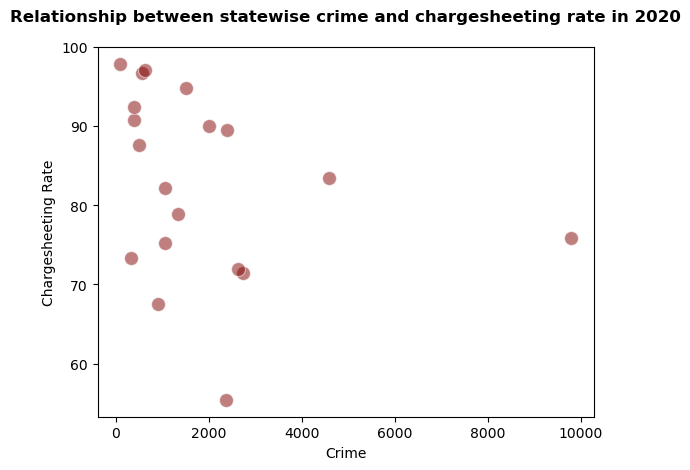

In [4]:
plt.figure()

sns.scatterplot(data=df[0:19],x='Year_2020',y='Chargesheeti ng Rate (2020)',s=100,alpha=0.5,color='maroon')
plt.title('Relationship between statewise crime and chargesheeting rate in 2020\n',fontweight='bold')
plt.xlabel('Crime')
plt.ylabel('Chargesheeting Rate')

plt.show()

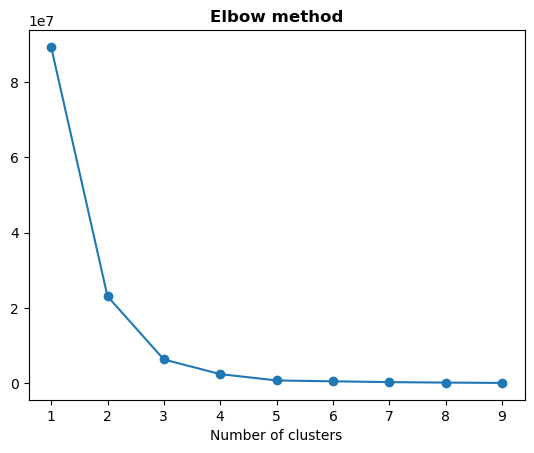

In [5]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

x = df['Year_2020'][0:19]
y = df['Chargesheeti ng Rate (2020)'][0:19]

data = list(zip(x, y)) # making tuples 
Distortion = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    Distortion.append(kmeans.inertia_)

plt.plot(range(1,10), Distortion, marker='o')
plt.title('Elbow method',fontweight='bold')
plt.xlabel('Number of clusters')

plt.show()

In [6]:
# According to the elbow method, k=3 is a good choice for the number of clusters

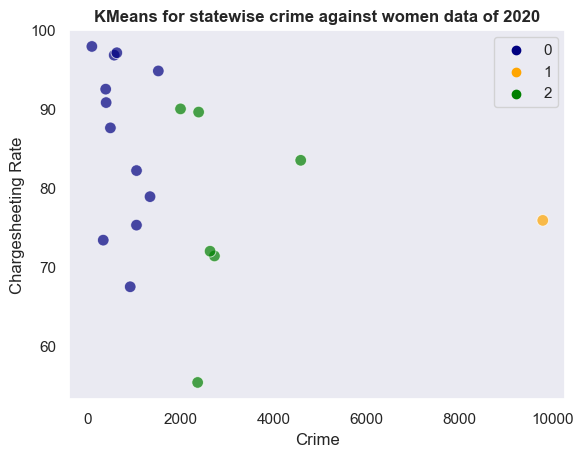

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

sns.set_theme(style='dark')
sns.scatterplot(data=df[0:19],x='Year_2020',y='Chargesheeti ng Rate (2020)',
                hue=kmeans.labels_,palette=['navy','orange','green'],s=70,alpha=0.7)

plt.title('KMeans for statewise crime against women data of 2020',fontweight='bold')
plt.xlabel('Crime')
plt.ylabel('Chargesheeting Rate')
plt.show()